In [13]:
import mysql.connector as mysqlConnector
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import timeit


In [14]:
con = mysqlConnector.connect(host='Localhost',user='root',passwd='azerty455', database='foody')
query = ''' SELECT PaysLiv, NomMess, Portt FROM foody.commande join foody.messager using(NoMess) where NomMess in ('Speedy Express','United Package','Federal Shipping'); '''
def sql_to_df(sql_query):
    df = pd.read_sql(sql_query, con)
    return df
foody= sql_to_df(query)
pvfoody=foody.pivot_table(values='Portt',index='PaysLiv',columns='NomMess')
pvfoody. head()

NomMess,Federal Shipping,Speedy Express,United Package
PaysLiv,,,
Argentina,13.885000,26.394000,58.724286
Austria,162.084615,184.880833,204.388667
Belgium,34.966250,89.666667,91.426250
Brazil,48.461176,49.771613,71.812286
Canada,53.018125,71.025000,106.570000


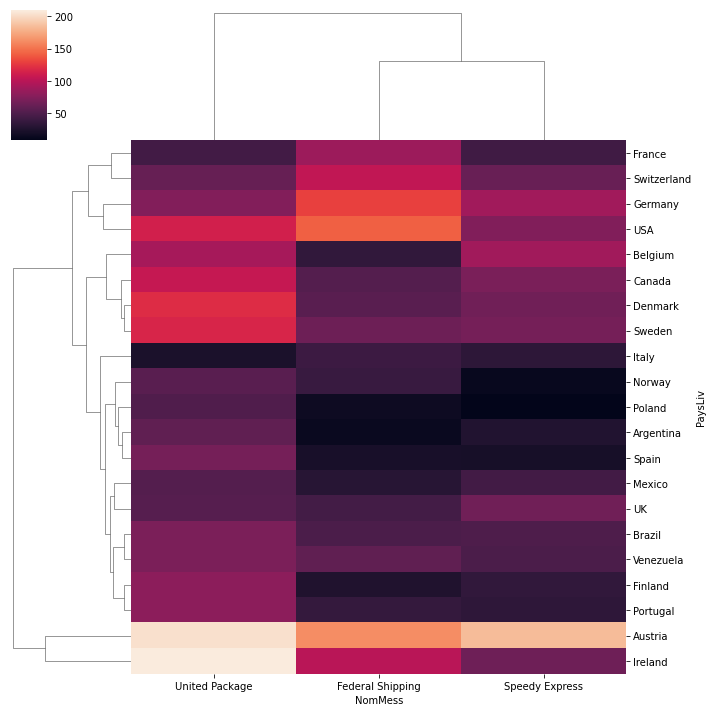

In [15]:
sns.clustermap(pvfoody)

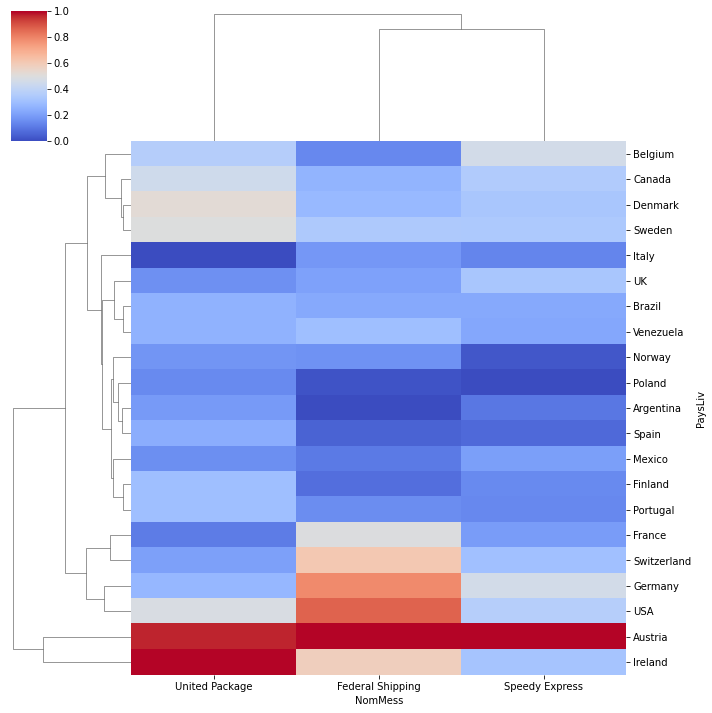

In [16]:
sns.clustermap(pvfoody,cmap='coolwarm',standard_scale=1)

In [17]:
query2 = ''' SELECT Portt, PrixUnit, Qte FROM foody.commande join foody.detailscommande using(NoCom); '''
foodyq= sql_to_df(query2)
foodyq.head()

,Portt,PrixUnit,Qte
0,32.38,14.0,12.0
1,32.38,9.8,10.0
2,32.38,34.8,5.0
3,11.61,18.6,9.0
4,11.61,42.4,40.0


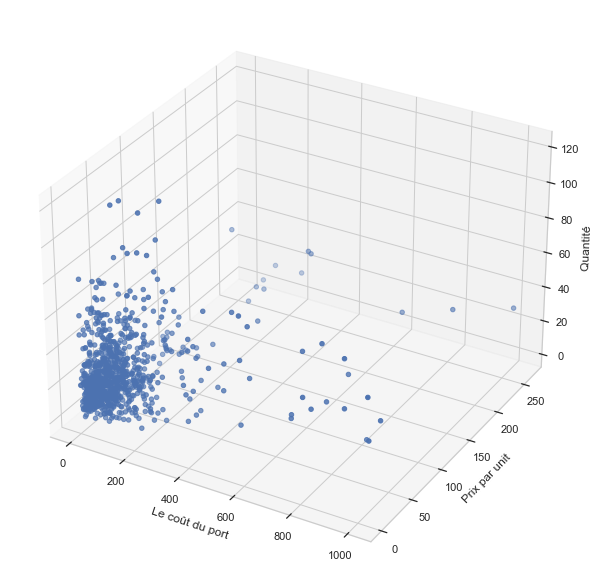

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

df = foodyq
sns.set(style = "whitegrid")

fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
fig.savefig('3D_Foody.jpeg', dpi=100)
ax = fig.add_subplot(111, projection = '3d')

x = df['Portt']
y = df['PrixUnit']
z = df['Qte']

ax.set_xlabel("Le coût du port")
ax.set_ylabel("Prix par unit")
ax.set_zlabel("Quantité ")

ax.scatter(x, y, z)

plt.show()

<AxesSubplot:>

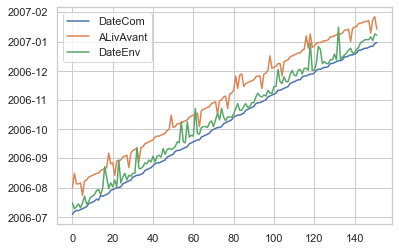

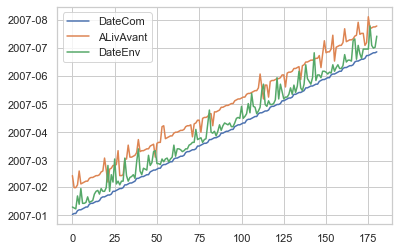

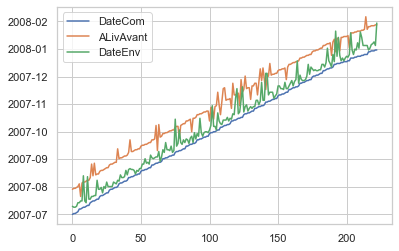

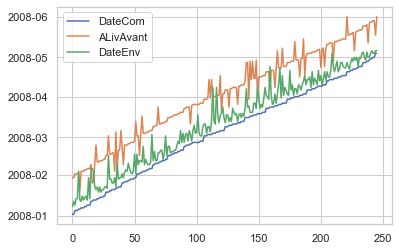

In [21]:
query2006='''SELECT DateCom, ALivAvant, DateEnv FROM foody.commande where DateEnv is not null and DateCom<'2007-01-01 00:00:00';'''
query20071='''SELECT DateCom, ALivAvant, DateEnv FROM foody.commande where DateEnv is not null and DateCom>'2007-01-01 00:00:00' and DateCom<'2007-6-30 00:00:00';'''
query20072='''SELECT DateCom, ALivAvant, DateEnv FROM foody.commande where DateEnv is not null and DateCom>'2007-6-30 00:00:00' and DateCom<'2008-01-01 00:00:00';'''
query2008='''SELECT DateCom, ALivAvant, DateEnv FROM foody.commande where DateEnv is not null and DateCom>'2008-01-01 00:00:00';'''
foodyd06= sql_to_df(query2006)
foodyd071= sql_to_df(query20071)
foodyd072= sql_to_df(query20072)
foodyd08= sql_to_df(query2008)
foodyd06.plot()
foodyd071.plot()
foodyd072.plot()
foodyd08.plot()

In [23]:
SELECT NoCom,DateCom, ALivAvant, DateEnv FROM foody.commande where DateEnv is not null and DateCom<'2007-01-01 00:00:00';
SELECT Count(DateEnv>=ALivAvant) FROM foody.commande where DateEnv is not null and DateCom<'2007-01-01 00:00:00'  ;
SELECT Count(*) FROM foody.commande where DateEnv is not null and DateCom>'2007-6-30 00:00:00' and DateCom<'2008-01-01 00:00:00' and DateEnv>=ALivAvant;
SELECT Count(*)  FROM foody.commande where DateEnv is not null and DateCom>'2008-01-01 00:00:00'and DateEnv>=ALivAvant;
SELECT Count(*), DateCom, ALivAvant, DateEnv FROM foody.commande where DateEnv is not null and DateCom>'2007-01-01 00:00:00' and DateCom<'2007-6-30 00:00:00'and DateEnv>=ALivAvant;
SELECT Count(*), DateCom, ALivAvant, DateEnv FROM foody.commande where DateEnv is not null and DateCom>'2007-01-01 00:00:00' and DateCom<'2007-6-30 00:00:00';
SELECT Count(*), DateCom, ALivAvant, DateEnv FROM foody.commande where DateEnv is not null and DateCom>'2007-6-30 00:00:00' and DateCom<'2008-01-01 00:00:00';
SELECT Count(*), DateCom, ALivAvant, DateEnv FROM foody.commande where DateEnv is not null and DateCom>'2008-01-01 00:00:00';
select NomCateg, Remise, Count(Remise) from foody.detailscommande natural join foody.produit natural join foody.categorie group by NomCateg, Remise;
SELECT  DATEDIFF(DateEnv,AlivAvant), DateCom, ALivAvant, DateEnv FROM foody.commande where DateEnv is not null and DateCom>'2008-01-01 00:00:00' and DateEnv>=ALivAvant;


SELECT Count(*) FROM foody.commande where DateEnv is not null and DateCom>'2007-6-30 00:00:00' and DateCom<'2008-01-01 00:00:00' and DATEDIFF(AlivAvant,DateCom)<30;
SELECT Count(*), DateCom, ALivAvant, DateEnv FROM foody.commande where DateEnv is not null and DateCom>'2007-01-01 00:00:00'and DateCom<'2007-6-30 00:00:00' and DATEDIFF(AlivAvant,DateCom)<30;

SyntaxError: invalid syntax (<ipython-input-23-7560d7d2be19>, line 1)

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()


In [25]:
queryp1 = ''' select NomCateg, Remise, Count(Remise)  from foody.detailscommande natural join foody.produit natural join foody.categorie group by NomCateg, Remise having NomCateg='drinks'; '''
queryp2 = ''' select NomCateg, Remise, Count(Remise)  from foody.detailscommande natural join foody.produit natural join foody.categorie group by NomCateg, Remise having NomCateg='Condiments'; '''
queryp3 = ''' select NomCateg, Remise, Count(Remise)  from foody.detailscommande natural join foody.produit natural join foody.categorie group by NomCateg, Remise having NomCateg='Desserts'; '''
queryp4 = ''' select NomCateg, Remise, Count(Remise)  from foody.detailscommande natural join foody.produit natural join foody.categorie group by NomCateg, Remise having NomCateg='Dairy Products'; '''
queryp5 = ''' select NomCateg, Remise, Count(Remise)  from foody.detailscommande natural join foody.produit natural join foody.categorie group by NomCateg, Remise having NomCateg='Grains/Cereals'; '''
queryp6 = ''' select NomCateg, Remise, Count(Remise)  from foody.detailscommande natural join foody.produit natural join foody.categorie group by NomCateg, Remise having NomCateg='Meat/Poultry'; '''
queryp7 = ''' select NomCateg, Remise, Count(Remise)  from foody.detailscommande natural join foody.produit natural join foody.categorie group by NomCateg, Remise having NomCateg='Produce'; '''
queryp8 = ''' select NomCateg, Remise, Count(Remise)  from foody.detailscommande natural join foody.produit natural join foody.categorie group by NomCateg, Remise having NomCateg='Seafood'; '''
foodyp1= sql_to_df(queryp1)
foodyp2= sql_to_df(queryp2)
foodyp3= sql_to_df(queryp3)
foodyp4= sql_to_df(queryp4)
foodyp5= sql_to_df(queryp5)
foodyp6= sql_to_df(queryp6)
foodyp7= sql_to_df(queryp7)
foodyp8= sql_to_df(queryp8)

foodyp8.head()

,NomCateg,Remise,Count(Remise)
0,Seafood,0.05,4
1,Seafood,0.00,28
2,Seafood,0.10,8
3,Seafood,0.15,3
4,Seafood,0.20,4


In [26]:
data1 = foodyp1.groupby("Remise")["Count(Remise)"].sum()
data2 = foodyp2.groupby("Remise")["Count(Remise)"].sum()
data3 = foodyp3.groupby("Remise")["Count(Remise)"].sum()
data4 = foodyp4.groupby("Remise")["Count(Remise)"].sum()
data5 = foodyp5.groupby("Remise")["Count(Remise)"].sum()
data6 = foodyp6.groupby("Remise")["Count(Remise)"].sum()
data7 = foodyp7.groupby("Remise")["Count(Remise)"].sum()
data8 = foodyp8.groupby("Remise")["Count(Remise)"].sum()

data8

Remise
0.00    28
0.05     4
0.10     8
0.15     3
0.20     4
0.25     1
Name: Count(Remise), dtype: int64

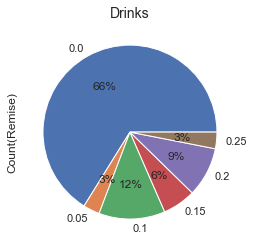

In [27]:
data1.plot.pie(autopct="%.f%%");
plt.title("Drinks", fontsize=14);


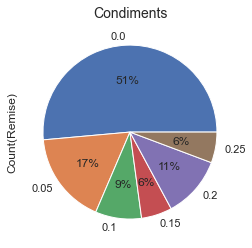

In [126]:
data2.plot.pie(autopct="%.f%%");
plt.title("Condiments", fontsize=14);

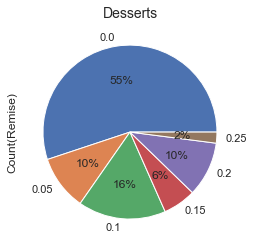

In [133]:
data3.plot.pie(autopct="%.f%%");
plt.title("Desserts", fontsize=14);

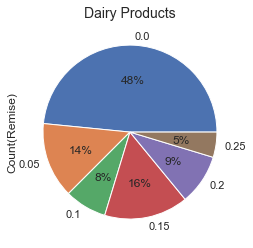

In [128]:
data4.plot.pie(autopct="%.f%%");
plt.title("Dairy Products", fontsize=14);

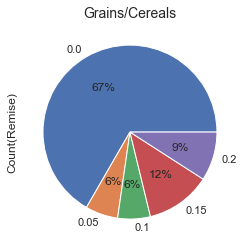

In [129]:
data5.plot.pie(autopct="%.f%%");
plt.title("Grains/Cereals", fontsize=14);

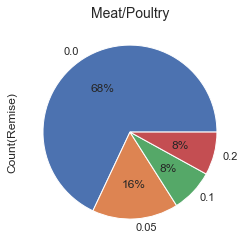

In [130]:
data6.plot.pie(autopct="%.f%%");
plt.title("Meat/Poultry", fontsize=14);

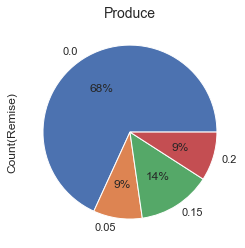

In [131]:
data7.plot.pie(autopct="%.f%%");
plt.title("Produce", fontsize=14);

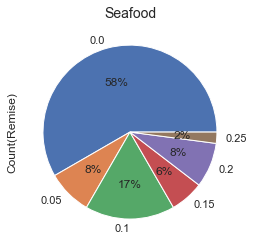

In [132]:
data8.plot.pie(autopct="%.f%%");
plt.title("Seafood", fontsize=14);

In [31]:
import os

import numpy as np

import folium
from folium import plugins

In [36]:
import pandas as pd
import requests
from xml.etree import ElementTree
import numpy as np
import folium

In [37]:
map = folium.Map(location=[38.9, -77.05], zoom_start=12)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=df_counters['Name'][point]).add_to(map)
map

NameError: name 'locationlist' is not defined

In [38]:
m = folium.Map([45, 3], zoom_start=4)

plugins.ScrollZoomToggler().add_to(m)

m.save(os.path.join('.', 'Plugins_0.html'))

m